In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import planet_sampler_pop as ps
%load_ext autoreload
%autoreload 2
import scipy.interpolate as irp
import math
import scipy.integrate as si
from astropy.io import fits

[1.4261454e-01 7.2400314e-01 1.5073907e+02 ... 1.3556236e+00 4.6149695e-01
 2.6614502e+01]


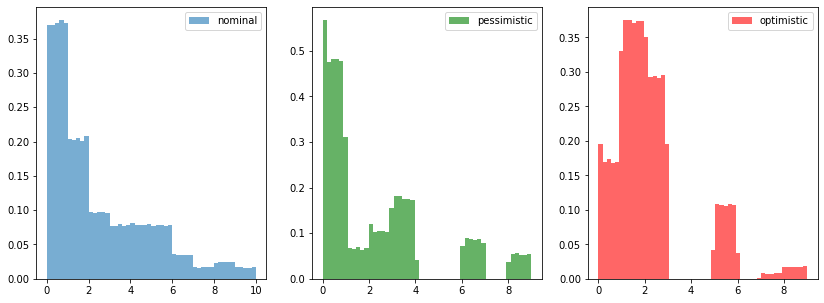

In [33]:
with fits.open("zodi/nominal_maxL_distribution-Dec2019.fits") as f:
    nominal = f[0].data
    print(nominal)
with fits.open("zodi/1sigma_pessimistic_median_distribution.fits") as f:
    pessimistic = f[0].data
with fits.open("zodi/1sigma_optimistic_median_distribution.fits") as f:
    optimistic = f[0].data
nbins = 50
plt.figure(figsize= (14,5))
plt.subplot(1,3,1)
plt.hist(nominal[nominal < 10], bins = nbins, density = True, label = "nominal", alpha = 0.6)
plt.legend()
plt.subplot(1,3,2)
plt.hist(pessimistic[pessimistic < 10], bins = nbins, density = True , label = "pessimistic", alpha = 0.6, color = "g")
plt.legend()
plt.subplot(1,3,3)
plt.hist(optimistic[optimistic < 10], bins = nbins, density = True, label = "optimistic", alpha = 0.6, color = "r")
plt.legend()


In [29]:
test = pd.DataFrame(nominal)

In [34]:
test[0].describe()

count    300000.000000
mean         68.134163
std         139.020111
min           0.000003
25%           0.926220
50%           3.226050
75%          19.575478
max         787.995605
Name: 0, dtype: float64

In [75]:
zodis = np.loadtxt("zodi/out_144.txt")
zodis_500_5_90 = np.loadtxt("zodi/out_512_5pc_90.txt")
zodis_500_5 = np.loadtxt("zodi/out_512_5pc.txt")

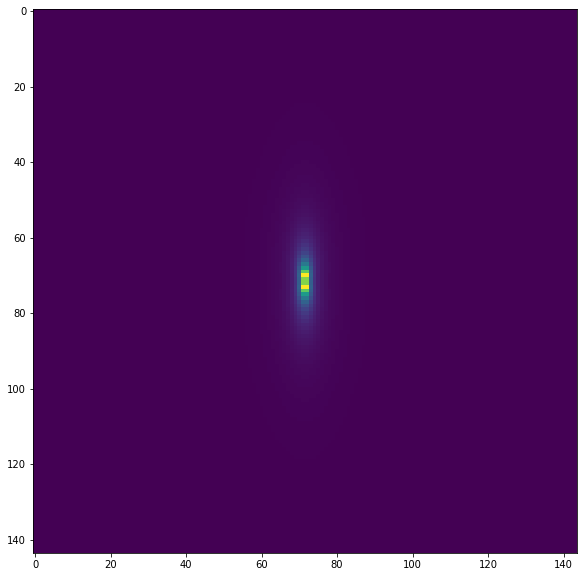

In [42]:
plt.figure(figsize = (14,10))
plt.imshow(zodis)

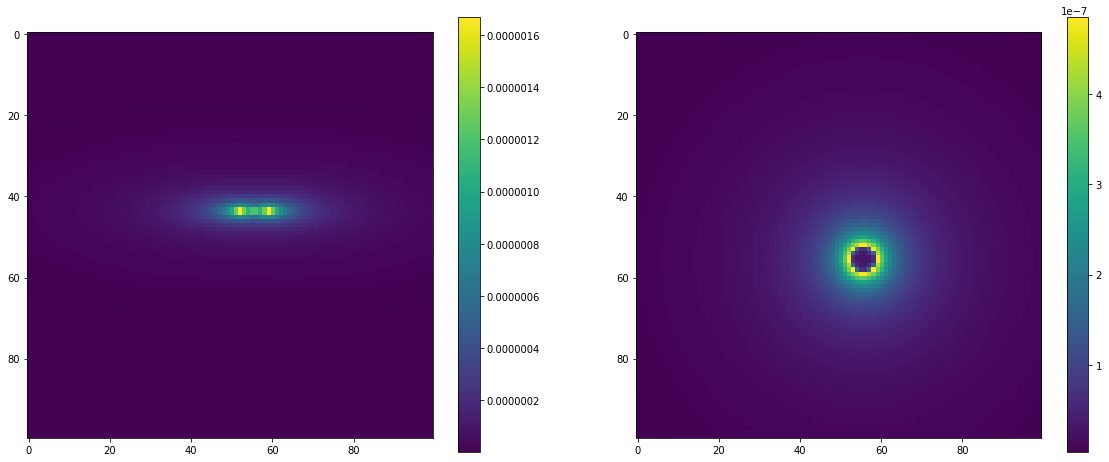

In [77]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.imshow(np.rot90(zodis_500_5_90[200:300,200:300]))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(zodis_500_5[200:300,200:300])
plt.colorbar()

In [57]:
zodis_500_5[300:400,300:400]/zodis_500_10[300:400,300:400]

/home/emilio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[ 6.26667369,  6.31900594,  6.36834445, ..., 14.91695368,
        15.1629317 , 15.42970297],
       [ 6.31900594,  6.3662588 ,  6.41998776, ..., 14.95733054,
        15.20532758, 15.46941893],
       [ 6.36834445,  6.41998776,  6.46767512, ..., 15.05680019,
        15.31070863, 15.58467092],
       ...,
       [14.91695368, 14.95733054, 15.05680019, ...,         inf,
                inf,         inf],
       [15.1629317 , 15.20532758, 15.31070863, ...,         inf,
                inf,         inf],
       [15.42970297, 15.46941893, 15.58467092, ...,         inf,
                inf,         inf]])

In [64]:
np.argmax(zodis_500_10)

131838

In [72]:
zodis_500_5

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])